# BISMILLAH SING BEUNGHAR

## Convention

- Naming variable with ***snake_case***
- Use **Type Declaration** for every variables and functions
- **Zero** use of comments *(unless necessary)*
- Always write long arguments of a function with **newline**

In [92]:
definition: dict = {
    'ID_Transaction': 'Unique identifier for each transaction or event.',
    'temperature': 'Maximum temperature recorded over the last 10 hours in degrees Celsius.',
    'temperature_min': 'Minimum temperature recorded over the last 10 hours in degrees Celsius.',
    'temperature-1': 'Recorded temperature value from sensor 1 (unit: °C).',
    'temperature-2': 'Recorded temperature value from sensor 2 (unit: °C).',
    'temperature-3': 'Recorded temperature value from sensor 3 (unit: °C).',
    'apparent_temperature_max': 'Maximum perceived or "feels-like" temperature (unit: °C).',
    'apparent_temperature_min': 'Minimum perceived or "feels-like" temperature (unit: °C).',
    'ID_Area': 'Identifier for the specific area or region.',
    'Machine': 'Identifier or name of the machine involved in the event.',
    'timestamp': 'Timestamp of the recorded event or transaction.',
    'humidity': 'Recorded humidity level (percentage).',
    'Voltage-L': 'Voltage recorded on line L (unit: volts).',
    'Voltage-R': 'Voltage recorded on line R (unit: volts).',
    'Voltage-M': 'Voltage recorded on line M (unit: volts).',
    'Current-M': 'Current recorded on line M (unit: amperes).',
    'Current-R': 'Current recorded on line R (unit: amperes).',
    'Current-T': 'Current recorded on line T (unit: amperes).',
    'RPM': 'Rotations per minute of the primary system or component.',
    'RPM-1': 'Rotations per minute recorded by sensor 1.',
    'RPM-2': 'Rotations per minute recorded by sensor 2.',
    'RPM-3': 'Rotations per minute recorded by sensor 3.',
    'Vibration-1': 'Vibration intensity recorded by sensor 1 (unit: mm/s or m/s²).',
    'Vibration-2': 'Vibration intensity recorded by sensor 2 (unit: mm/s or m/s²).',
    'Power': 'Power consumption or output of the system (unit: watts).',
    'Power_Backup': 'Indicates whether the backup power system was utilized (Yes/No).',
    'Status': 'Operational status of the machine, indicating whether it is in "Breakdown" or "Normal" condition.',
    'Breakdown_Category': 'Specific category or cause of breakdown.',
    "Mesin": "Name or description of the machine.",
    "Country Machine": "Country from which the machine was imported.",
    "ID_Area": "Identifier for the area or region where the machine is located.",
    "Last Maintenance": "Date of the most recent maintenance performed on the machine.",
    "Status Sparepart": "Availability of spare parts for the machine (e.g., Available, Not Available).",
    "Age": "Age of the machine in years (or other relevant unit)."
}


## Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import mutual_info_regression


In [94]:
pd.set_option('display.max_columns', None)

## Importing Datasets

In [95]:
datachunks = []

for chunk in pd.read_csv("dataset/train.csv", chunksize=100000):
    datachunks.append(chunk)

train_df = pd.concat(datachunks, ignore_index=True)
# train_df = pd.read_csv("dataset/train.csv", nrows=1000000)

In [96]:
machine_area_df : pd.DataFrame = pd.read_csv("dataset/Machine-Area.csv")
machine_list_df : pd.DataFrame = pd.read_csv("dataset/Machine-List.csv")
area_list_df    : pd.DataFrame = pd.read_csv("dataset/Area-List.csv")

In [97]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)

for train_index, test_index in strat_split.split(train_df, train_df['Status']):
    train_df = train_df.iloc[test_index]

In [ ]:
train_df['Status'] = train_df['Status'].map({'Normal': 0, 'Warning': 1, 'Breakdown': 2})

## Data Definition

In [7]:
train_df.dtypes

ID_Transaction               object
temperature_10H_max (°C)    float64
temperature_10H_min (°C)    float64
temperature-1               float64
temperature-2               float64
temperature-3               float64
apparent_temperature_max    float64
apparent_temperature_min    float64
ID_Area                      object
Machine                      object
timestamp                    object
humidity                    float64
Voltage-L                   float64
Voltage-R                   float64
Voltage-M                   float64
Current-M                   float64
Current-R                   float64
Current-T                   float64
RPM                         float64
RPM-1                       float64
RPM-2                       float64
RPM-3                       float64
Vibration-1                 float64
Vibration-2                 float64
Power                       float64
Power_Backup                 object
Status                       object
Breakdown Category          

In [8]:
machine_list_df.dtypes.sort_values()

ID_Mesin           object
Mesin              object
Country Machine    object
dtype: object

In [9]:
machine_area_df.dtypes.sort_values()

Age                  int64
ID_Mesin            object
Mesin               object
Country Machine     object
ID_Area             object
Last Maintenance    object
Status Sparepart    object
dtype: object

In [10]:
area_list_df.dtypes.sort_values()

ID_Area     object
Area        object
Priority    object
dtype: object

![alt text](assets/erd-full.png "Title")

## Data Distribution

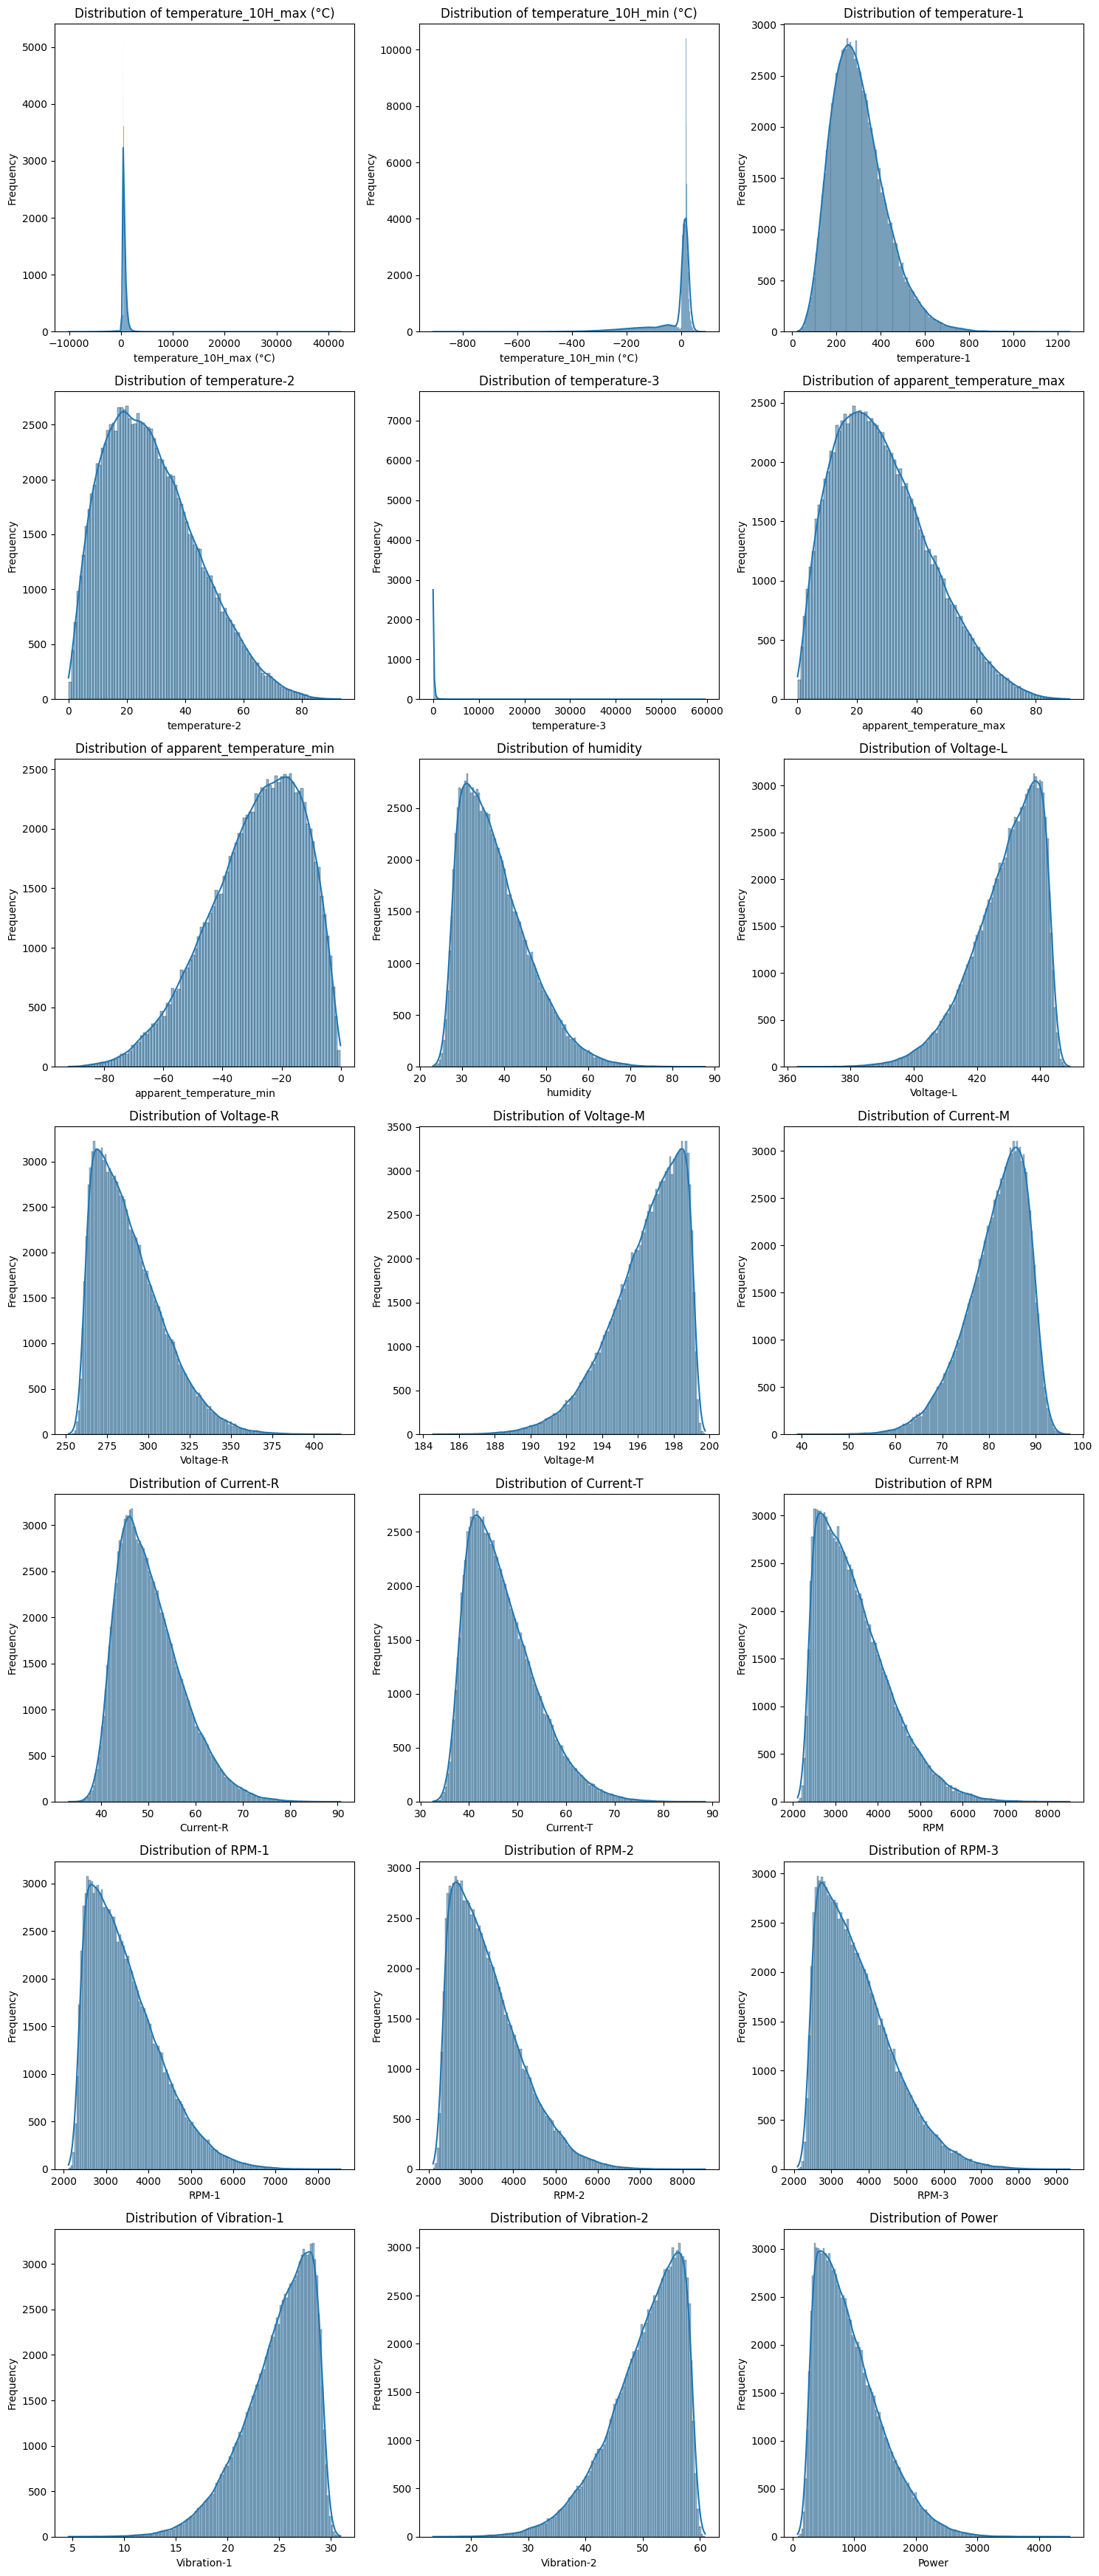

In [11]:
numeric_columns : list[str] = train_df.select_dtypes(include="number").columns
n_cols: int = len(numeric_columns)
n_rows: int = np.ceil(n_cols / 3).astype(int)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(train_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

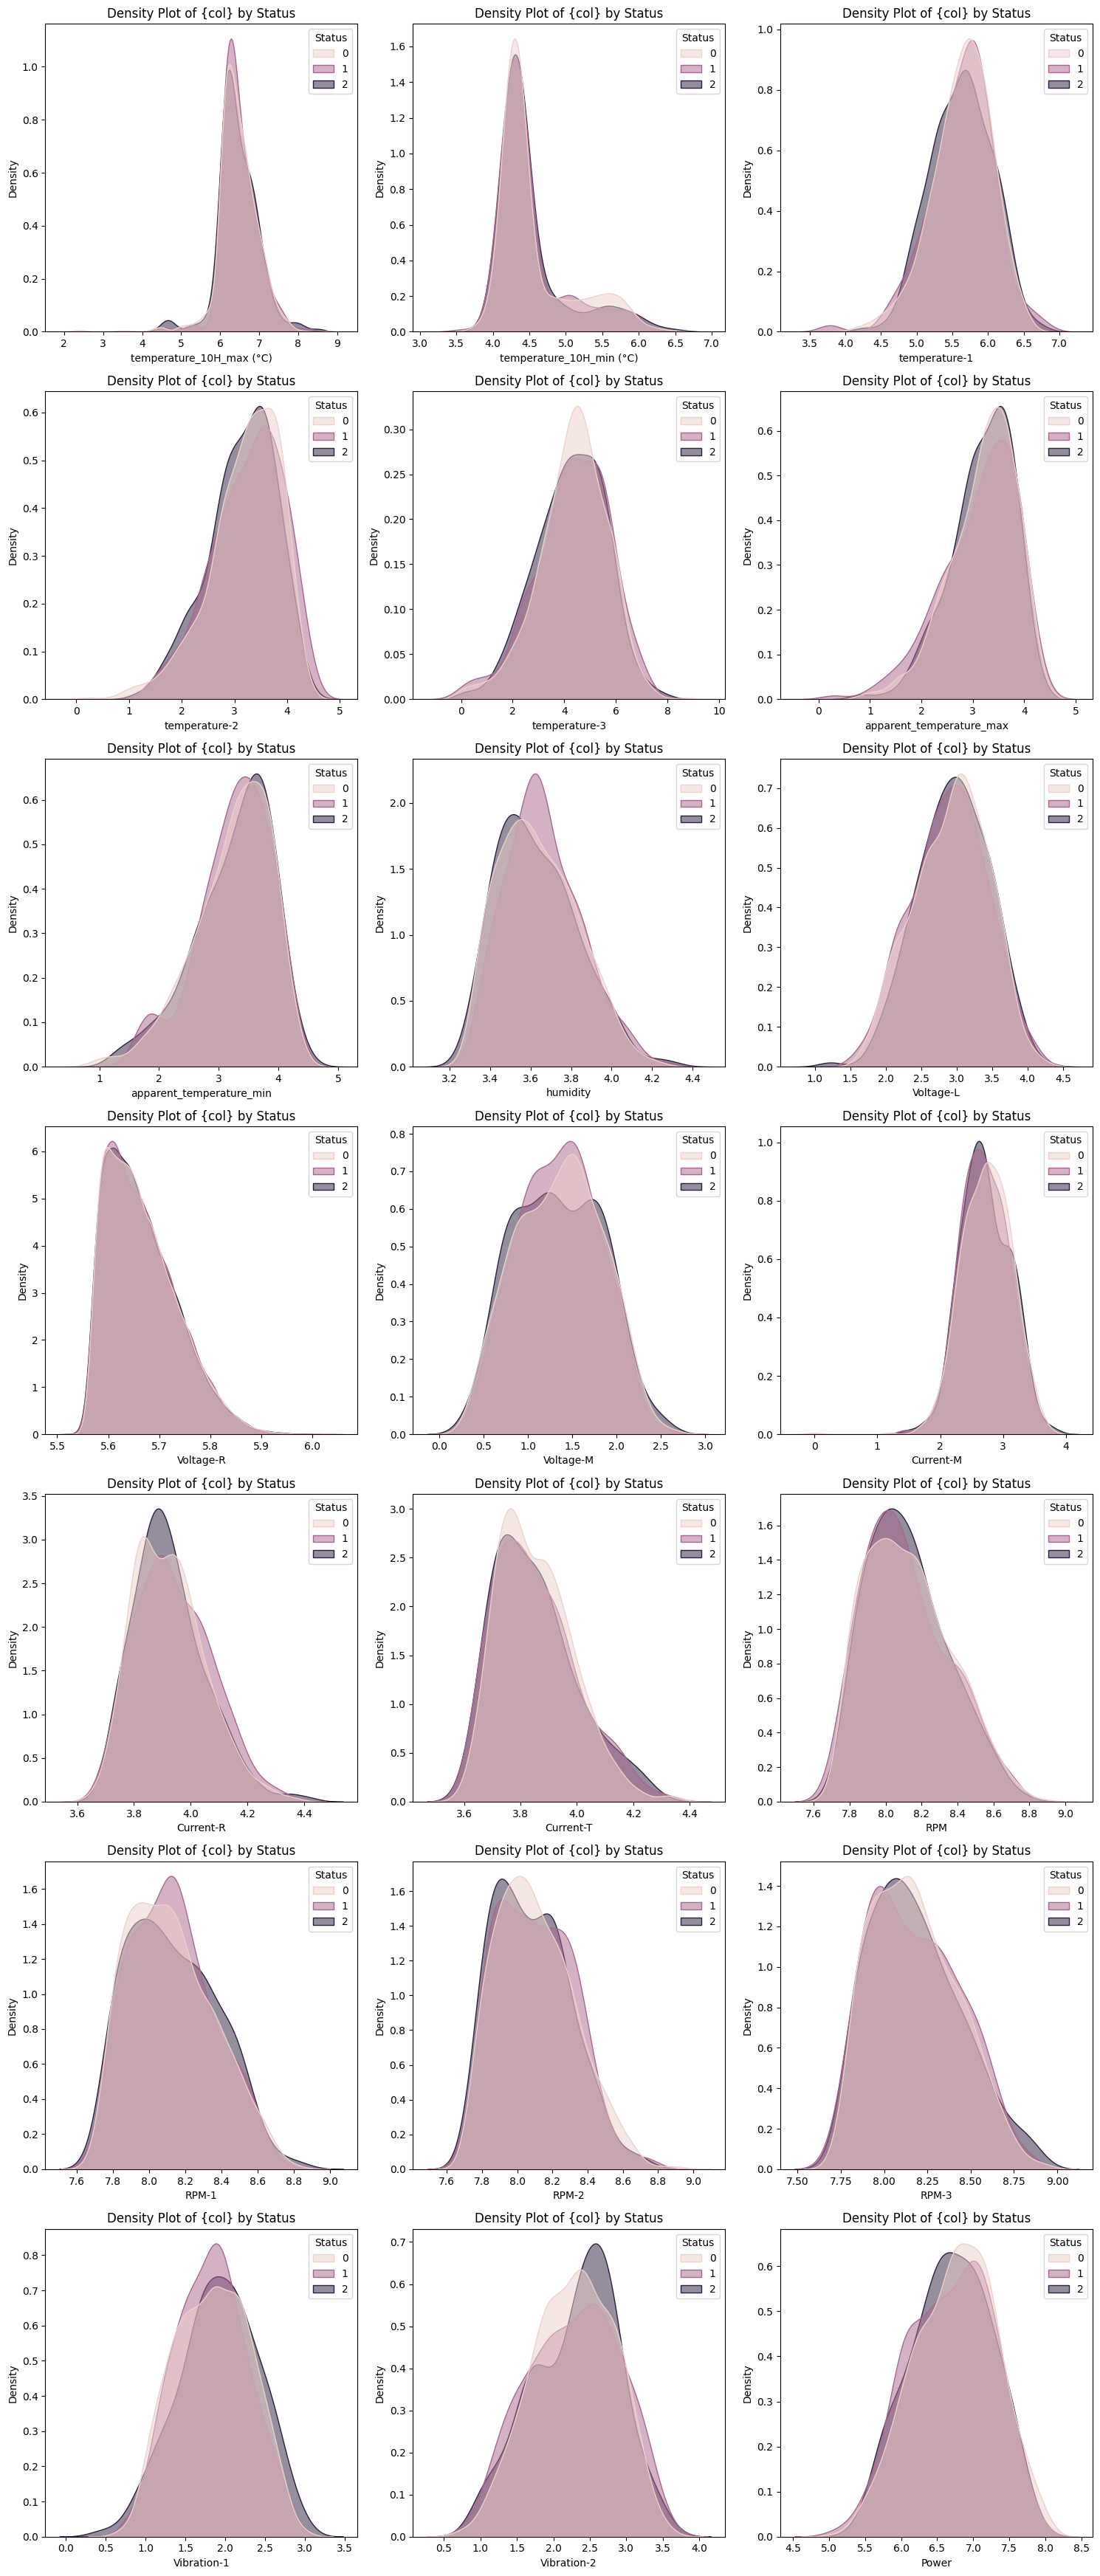

In [124]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=train_df, x=col, hue='Status', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title('Density Plot of {col} by Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


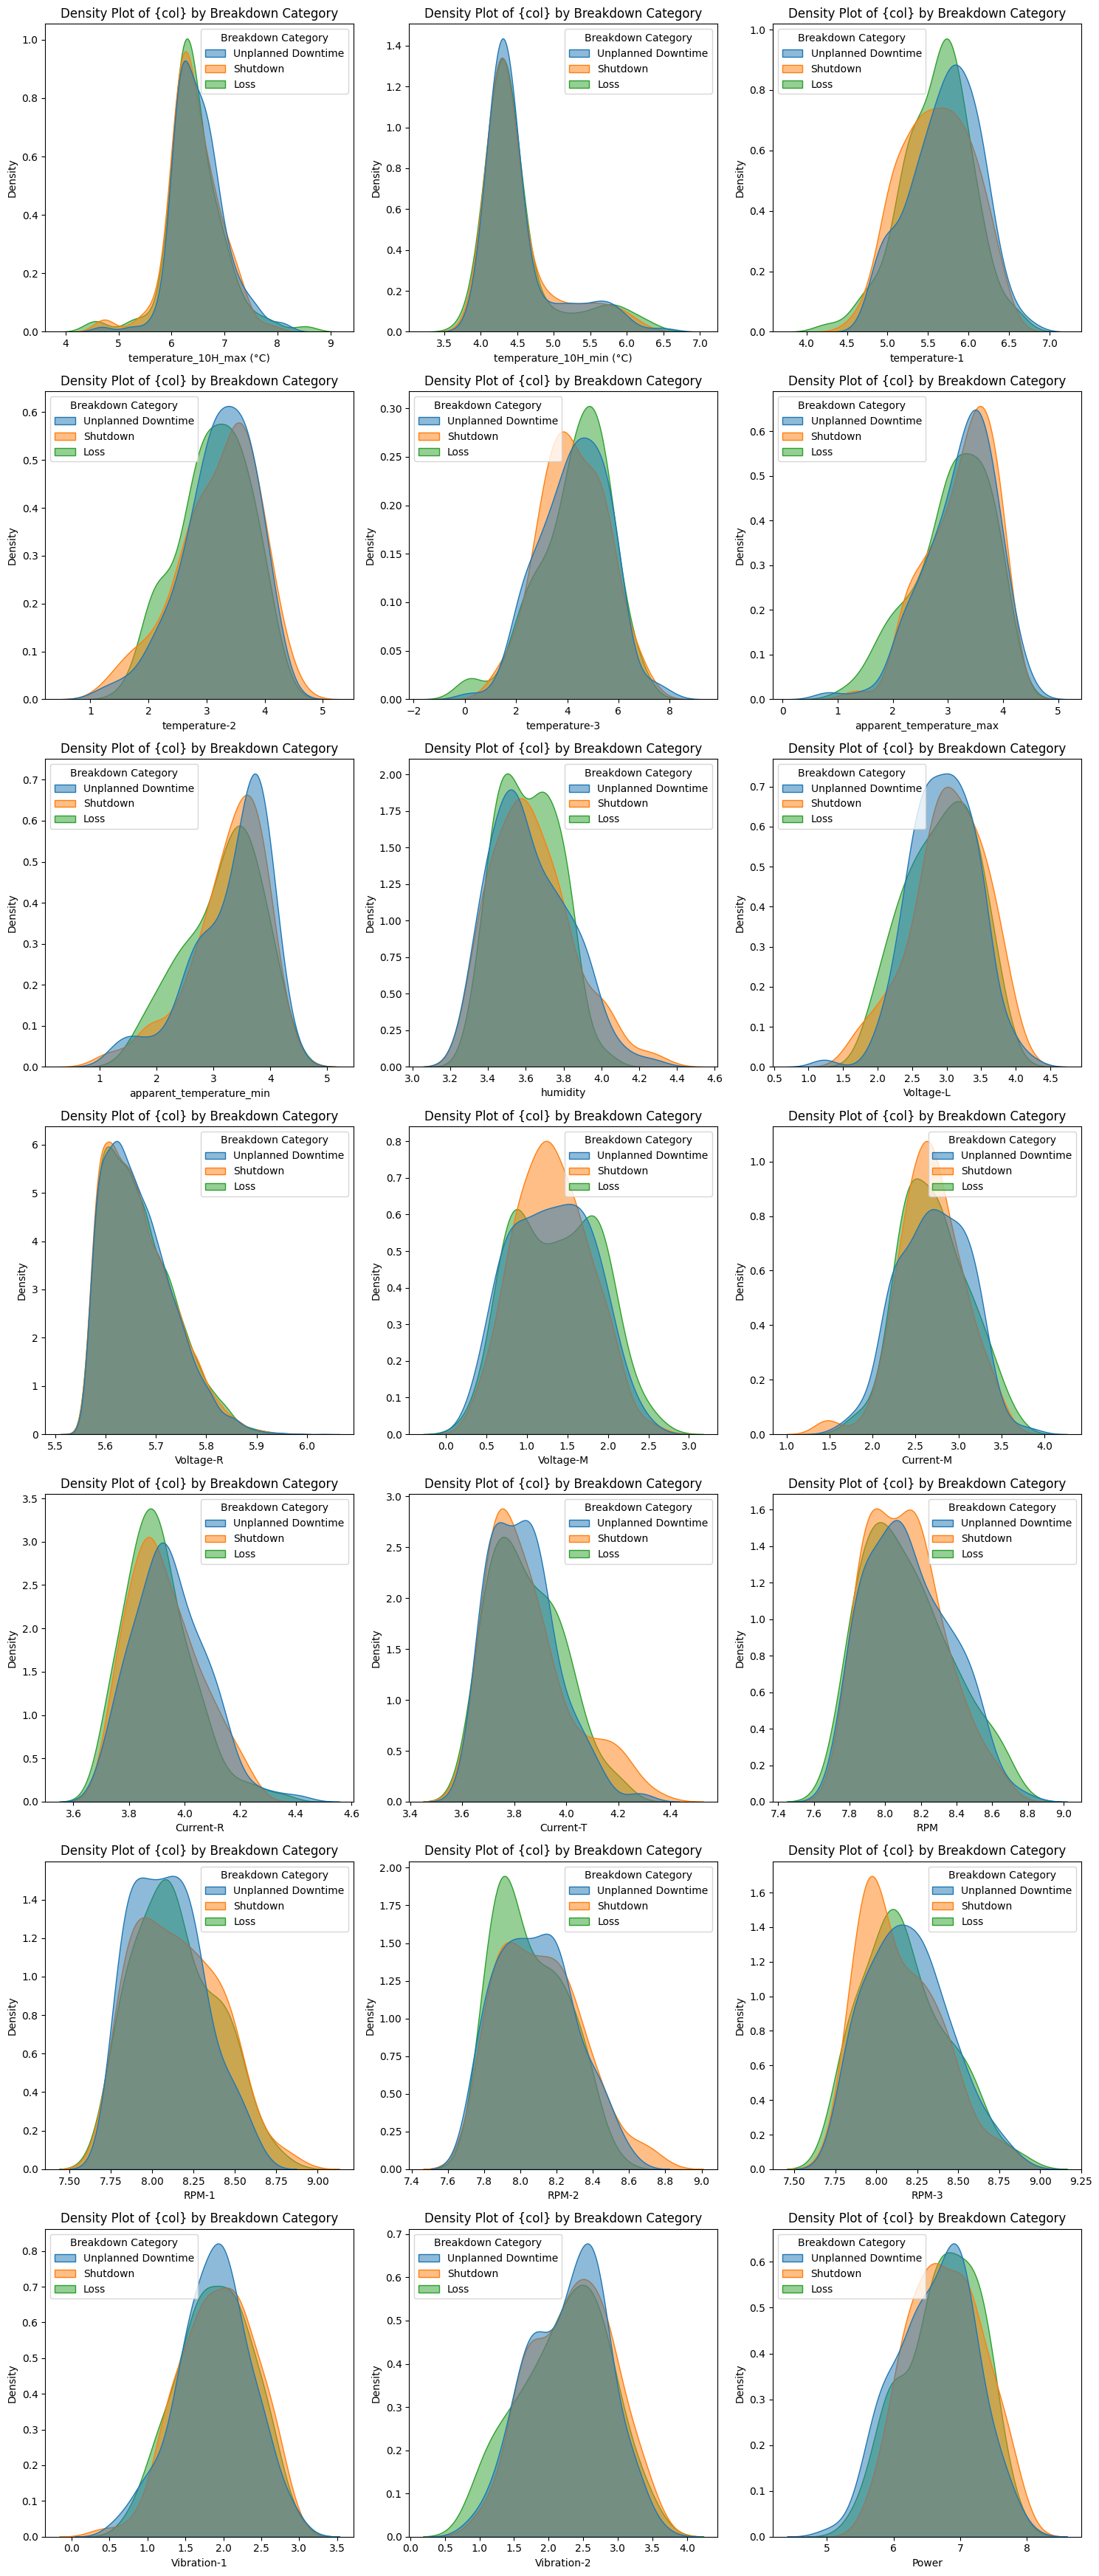

In [125]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.kdeplot(data=train_df, x=col, hue='Breakdown Category', fill=True, common_norm=False, alpha=0.5, ax=axes[i])
    axes[i].set_title('Density Plot of {col} by Breakdown Category')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
skewness = train_df[numeric_columns].skew()
print(skewness)

temperature_10H_max (°C)     4.430436
temperature_10H_min (°C)    -2.447064
temperature-1                0.821033
temperature-2                0.589572
temperature-3               42.140761
apparent_temperature_max     0.594521
apparent_temperature_min    -0.588185
humidity                     0.951736
Voltage-L                   -0.963254
Voltage-R                    0.961330
Voltage-M                   -0.984501
Current-M                   -0.850759
Current-R                    0.847139
Current-T                    0.927265
RPM                          0.976366
RPM-1                        0.978072
RPM-2                        0.980063
RPM-3                        0.977886
Vibration-1                 -0.960199
Vibration-2                 -0.979733
Power                        0.981415
dtype: float64


In [98]:
def skewed_transform(df) :
    numeric_columns : list[str] = df.select_dtypes(include="number").columns
    skewness = df[numeric_columns].skew()
    transformed_data = {}
    for col in numeric_columns:
        if skewness[col] < -0.5:
            max_val = df[col].max()
            reflected = max_val - df[col]
            transformed_data[col] = np.log1p(reflected)
        elif skewness[col] > 0.5:
            transformed_data[col] = np.log1p(df[col])
        else:
            transformed_data[col] = df[col]
    transformed_df = pd.DataFrame(transformed_data)
    return transformed_df

In [99]:
transformed_df = skewed_transform(train_df)
transformed_skewness = transformed_df.skew()
print(transformed_skewness)

temperature_10H_max (°C)   -0.956730
temperature_10H_min (°C)    1.454916
temperature-1              -0.414766
temperature-2              -0.855728
temperature-3              -0.333849
apparent_temperature_max   -0.863220
apparent_temperature_min   -0.859458
humidity                    0.478549
Voltage-L                  -0.171595
Voltage-R                   0.781968
Voltage-M                   0.018331
Current-M                  -0.137625
Current-R                   0.508889
Current-T                   0.567144
RPM                         0.454043
RPM-1                       0.455637
RPM-2                       0.465625
RPM-3                       0.413188
Vibration-1                -0.043555
Vibration-2                -0.191999
Power                      -0.173365
dtype: float64


c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# transformed_df2 = skewed_transform(transformed_df)
# transformed_skewness2 = transformed_df2.skew()
# print(transformed_skewness2)

temperature_10H_max (°C)   -0.316580
temperature_10H_min (°C)    0.960978
temperature-1              -0.414766
temperature-2               0.152437
temperature-3              -0.333849
apparent_temperature_max    0.147448
apparent_temperature_min    0.150548
humidity                    0.478549
Voltage-L                  -0.171595
Voltage-R                   0.748213
Voltage-M                   0.018331
Current-M                  -0.137625
Current-R                   0.445418
Current-T                   0.474751
RPM                         0.454043
RPM-1                       0.455637
RPM-2                       0.465625
RPM-3                       0.413188
Vibration-1                -0.043555
Vibration-2                -0.191998
Power                      -0.173365
dtype: float64


In [ ]:
# transformed_df3 = skewed_transform(transformed_df2)
# transformed_skewness3 = transformed_df3.skew()
# print(transformed_skewness3)

temperature_10H_max (°C)   -0.316580
temperature_10H_min (°C)    0.441078
temperature-1              -0.414766
temperature-2               0.152437
temperature-3              -0.333849
apparent_temperature_max    0.147448
apparent_temperature_min    0.150548
humidity                    0.478549
Voltage-L                  -0.171595
Voltage-R                   0.744074
Voltage-M                   0.018331
Current-M                  -0.137625
Current-R                   0.445418
Current-T                   0.474751
RPM                         0.454043
RPM-1                       0.455637
RPM-2                       0.465625
RPM-3                       0.413188
Vibration-1                -0.043555
Vibration-2                -0.191998
Power                      -0.173365
dtype: float64


In [100]:
train_df[numeric_columns] = transformed_df

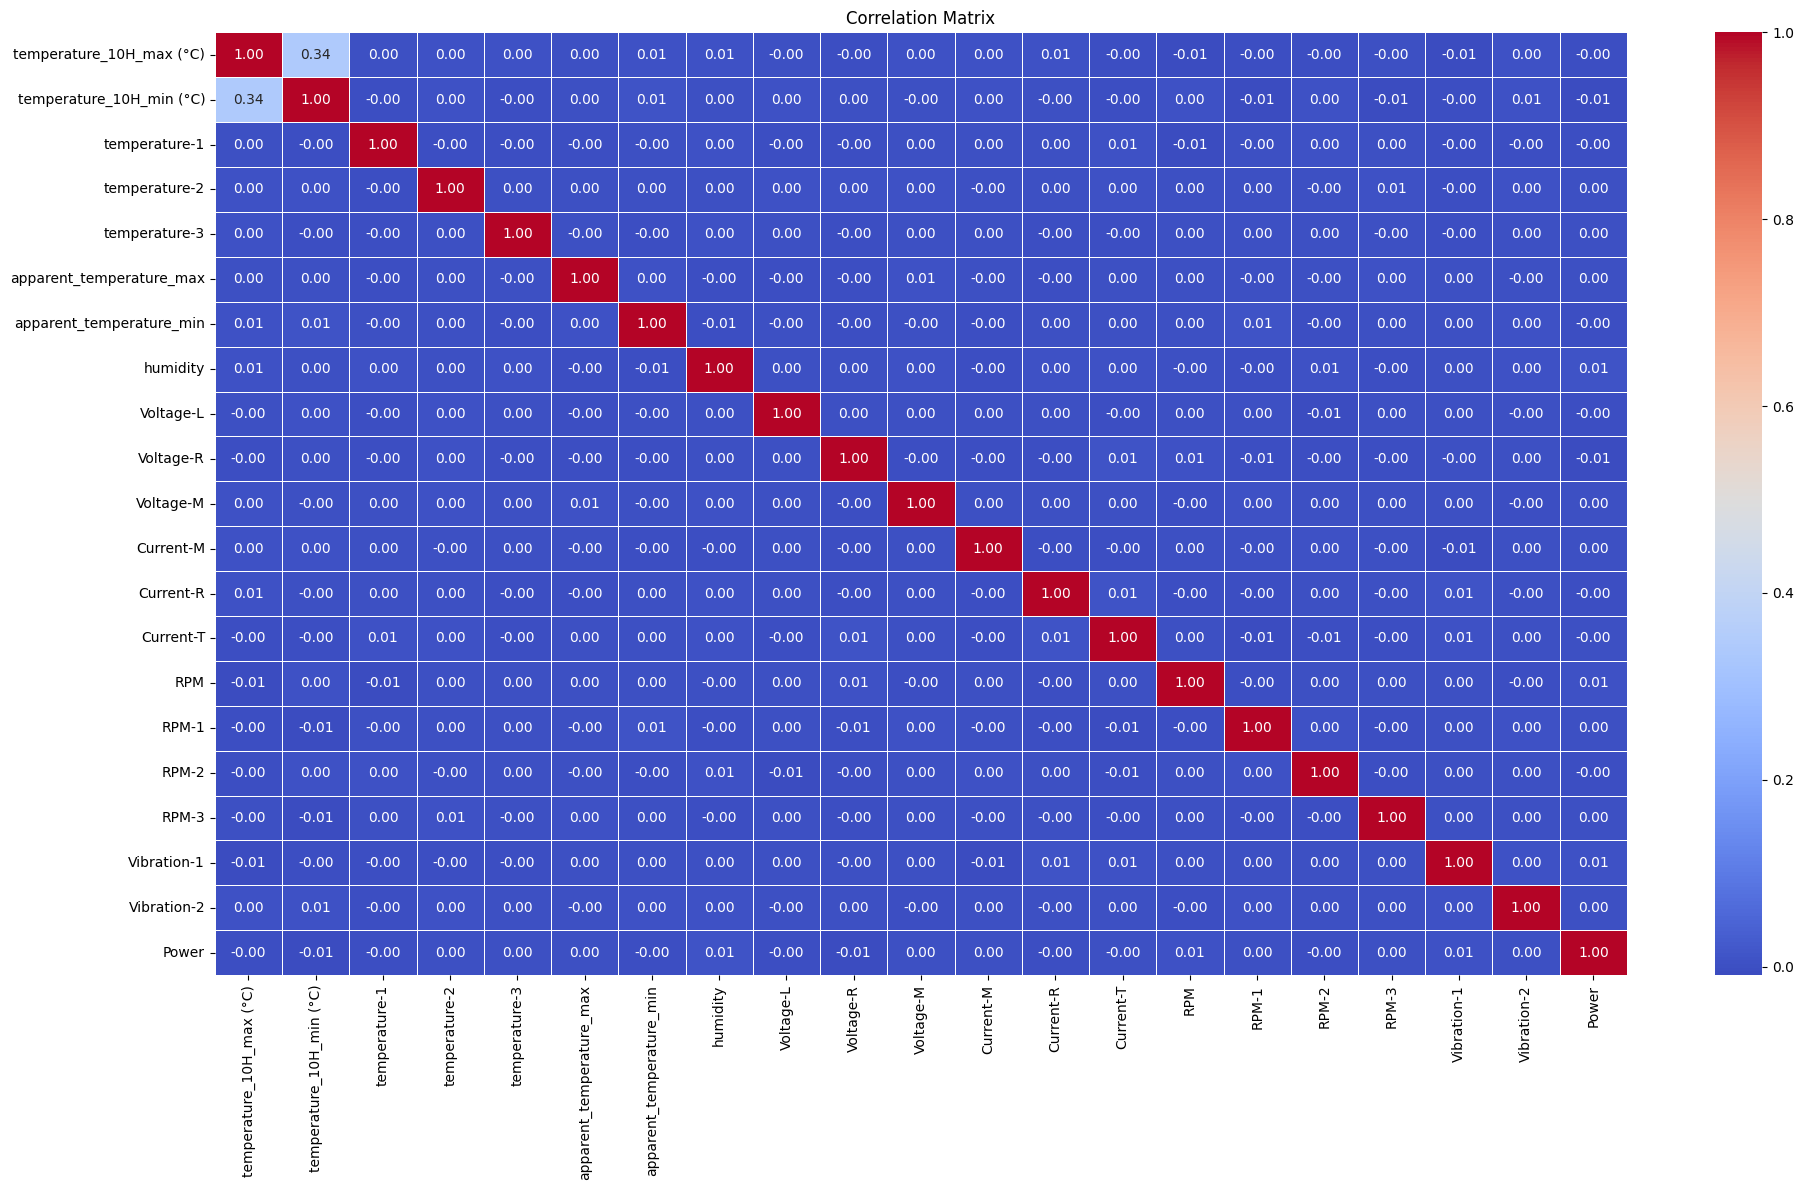

In [64]:
corr_matrix = train_df[numeric_columns].corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [65]:
sample = train_df.drop(columns=['Breakdown Category'])
sampe = sample.dropna(inplace=True)

In [66]:
sample.shape

(6125, 27)

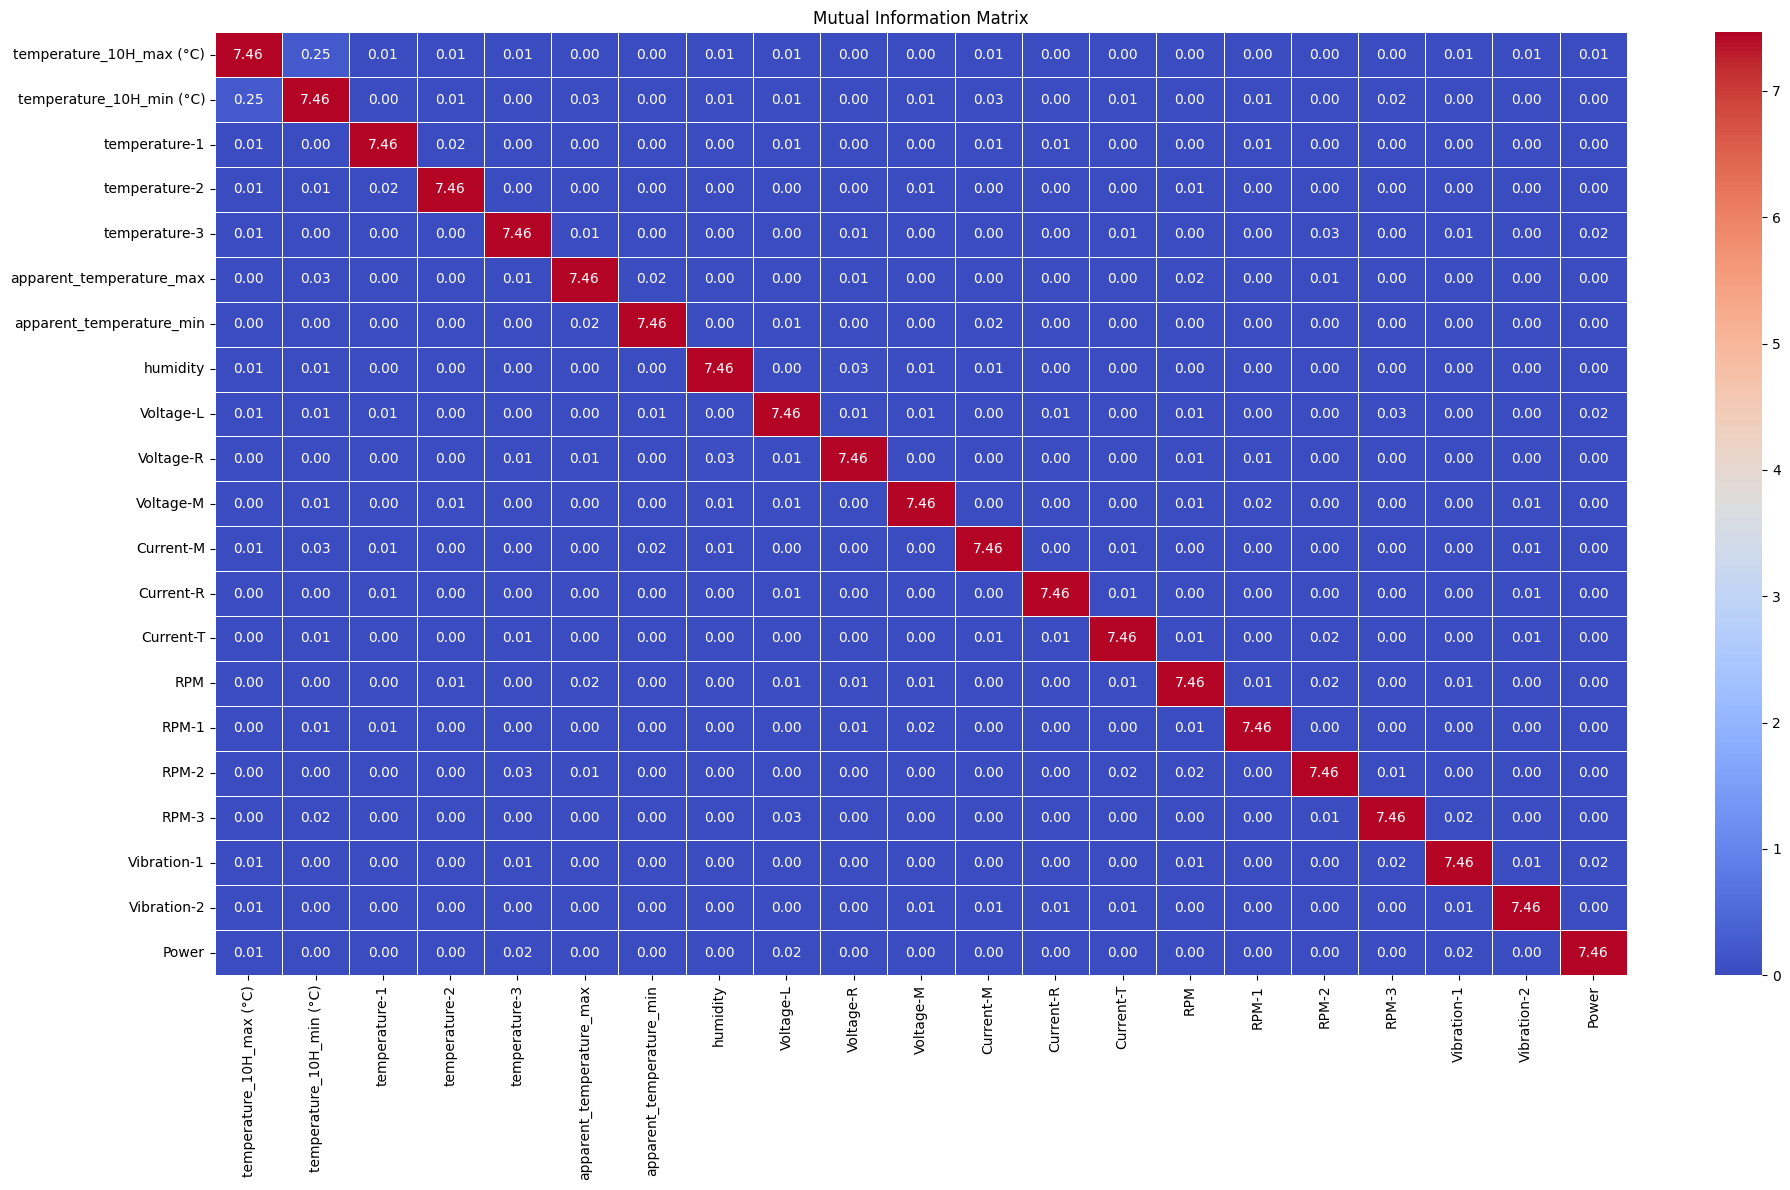

In [67]:
mutual_info_matrix = pd.DataFrame(
    [
        [
            mutual_info_regression(sample[[col1]], sample[col2])[0]
            for col2 in numeric_columns
        ]
        for col1 in numeric_columns
    ],
    columns=numeric_columns,
    index=numeric_columns
)

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(mutual_info_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mutual Information Matrix')
plt.tight_layout()
plt.show()

In [114]:
breakdown = train_df.groupby('Breakdown Category')['Status']
missing_B = train_df[train_df['Breakdown Category'].isna()]

In [112]:
breakdown.value_counts()

Breakdown Category  Status
Loss                2         8203
                    0         2469
                    1          773
Shutdown            2         8354
                    0         2324
                    1          779
Unplanned Downtime  2         8073
                    0         2358
                    1          796
Name: count, dtype: int64

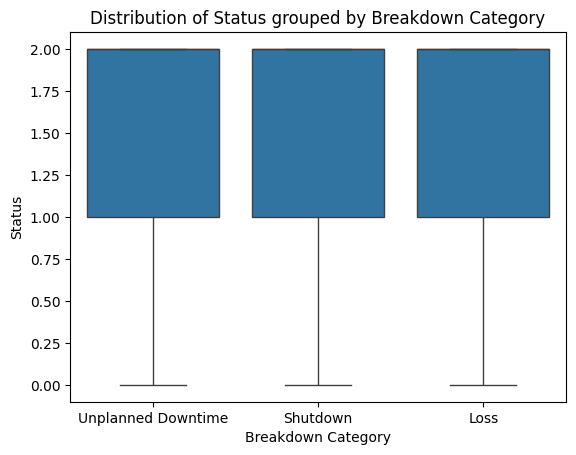

In [119]:
sns.boxplot(x='Breakdown Category', y='Status', data=train_df)
plt.title("Distribution of Status grouped by Breakdown Category")
plt.show()

In [116]:
missing_B['Status'].value_counts()

Status
0    72719
1    23152
Name: count, dtype: int64

In [120]:
contingency_table = pd.crosstab(train_df['Breakdown Category'], train_df['Status'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Status                 0    1     2
Breakdown Category                 
Loss                2469  773  8203
Shutdown            2324  779  8354
Unplanned Downtime  2358  796  8073


In [78]:
print("Feature Variances:")
print(train_df[numeric_columns].var())

Feature Variances:
temperature_10H_max (°C)    0.009802
temperature_10H_min (°C)    0.000260
temperature-1               0.179905
temperature-2               0.072412
temperature-3               1.861417
apparent_temperature_max    0.073521
apparent_temperature_min    0.073281
humidity                    0.038450
Voltage-L                   0.274153
Voltage-R                   0.000003
Voltage-M                   0.217610
Current-M                   0.153225
Current-R                   0.000673
Current-T                   0.000122
RPM                         0.051637
RPM-1                       0.051925
RPM-2                       0.050125
RPM-3                       0.062118
Vibration-1                 0.219010
Vibration-2                 0.324248
Power                       0.316030
dtype: float64


In [101]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) 
reduced_data = selector.fit_transform(train_df[numeric_columns])
print("Remaining features:", reduced_data.shape[1])

Remaining features: 20


In [102]:
selected_features = train_df[numeric_columns].columns[selector.get_support()]
transformed_df = pd.DataFrame(reduced_data, columns=selected_features)

In [103]:
train_df[selected_features] = transformed_df

In [105]:
def precision_recall_f1(tp, fp, fn):
    # Calculate Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Calculate Recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Calculate F1 Score
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, f1


In [107]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score



X = train_df.drop(columns=['Status' , 'ID_Transaction', 'ID_Area', 'Machine', 'timestamp', 'Power_Backup', 'Breakdown Category'])
y = train_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Extract values
tp = cm[1, 1]  # True Positives
fp = cm[0, 1]  # False Positives
fn = cm[1, 0]  # False Negatives
tn = cm[0, 0]  # True Negatives

precision, recall, f1 = precision_recall_f1(tp, fp, fn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Confusion Matrix:
 [[15947     9     4]
 [ 5155     1     2]
 [ 4879     3     0]]
Precision: 0.1
Recall: 0.0001939487975174554
F1 Score: 0.00038714672861014324


## Specific Questions

### Are all the `ID_Area` values in `Machine-List.csv` are also in `Area-List.csv` ?

**Answer = `Yes`**

In [19]:
machine_area_df['ID_Area'].isin(area_list_df['ID_Area']).value_counts()

ID_Area
True    1200
Name: count, dtype: int64

### Are all the `ID_Mesin` values in `Machine-List.csv` are also in `Machine-Area.csv` ?

**Answer = `Yes`**

In [20]:
machine_area_df['ID_Mesin'].isin(machine_list_df['ID_Mesin']).value_counts()

ID_Mesin
True    1200
Name: count, dtype: int64

### Are the `ID_Area` and `ID_Mesin` dependant to each other ?

Answer = `No`

In [21]:
machine_area_df[['ID_Area', 'ID_Mesin']].value_counts().sort_values(ascending=False).head(10)

ID_Area  ID_Mesin
ID28     H.1         2
ID38     E.2         2
ID20     I.4         2
ID9      K.1         2
ID21     B.4         2
ID37     J.2         2
         J.4         2
         K.1         2
ID38     A.2         2
         C.2         2
Name: count, dtype: int64

In [22]:
machine_area_df[['ID_Mesin', 'ID_Area']].value_counts().sort_values(ascending=False).head(10)

ID_Mesin  ID_Area
F.3       ID14       2
I.2       ID4        2
C.3       ID3        2
A.4       ID24       2
K.4       ID8        2
D.2       ID9        2
I.2       ID26       2
          ID30       2
          ID32       2
          ID34       2
Name: count, dtype: int64

### Is `Mesin` unique to `ID_Mesin` in `Machine-List.csv` ?

Answer = `Yes`

In [23]:
machine_list_df[["Mesin", "ID_Mesin"]].value_counts().sort_values(ascending=False).head()

Mesin        ID_Mesin
Bowl Cutter  F.3         1
Forklift     E.4         1
NL3          C.1         1
Formax       E.3         1
Hitech-1     D.1         1
Name: count, dtype: int64

In [24]:
machine_list_df[["ID_Mesin", "Mesin"]].value_counts().sort_values(ascending=False).head()

ID_Mesin  Mesin           
A.1       NL1                 1
A.2       Stuffer Linker 3    1
C.3       Jawfeng             1
A.3       Risco-TR700         1
A.4       Vacuum Filler-5     1
Name: count, dtype: int64

### Is the data consistent between `Machine-Area.csv` and `Machine-List.csv` ?

Answer = `Yes`

In [25]:
_ = pd.merge(machine_list_df, machine_area_df, on='ID_Mesin', suffixes=('_list', '_area'))

print("Amount of inconsistencies: ",
    len(_[
        (_['Mesin_list'] != _['Mesin_area']) |
        (_['Country Machine_list'] != _['Country Machine_area'])]))

Amount of inconsistencies:  0
